# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint

# Import API key
from api_keys import api_key
units = 'imperial'
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "weatherdata.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Defined URL
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

count_one = 0
set_one = 1


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#List of all variables 
city_two = []
cloudiness = []
dates = []
latitude = []
longitude = []
humidity = []
hightemp = []
countrylist = []
windspeed = []

#Record and set starting points 
count_one = 0
set_one = 1

#Structure for line data 

for city in cities:
    try: 
        response = requests.get(base_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countrylist.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        hightemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else: 
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")

    except Exception: 
        print("City Not Found, Skipping.")

print("-----------------\nData Retrieval Complete\n-------------------")


Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | saint-georges
Processing Record 4 of Set 1 | birao
Processing Record 5 of Set 1 | leningradskiy
Processing Record 6 of Set 1 | palu
Processing Record 7 of Set 1 | mahebourg
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | ahipara
Processing Record 10 of Set 1 | bambous virieux
City Not Found, Skipping.
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | nemuro
Processing Record 16 of Set 1 | northview
Processing Record 17 of Set 1 | hilo
City Not Found, Skipping.
Processing Record 18 of Set 1 | mys shmidta
Processing Record 19 of Set 1 | marechal deodoro
Processing Record 20 of Set 1 | half moon bay
Processing Record 21 of Set 1 | nechi
Processing Record 22 of Set 1 | alice springs
Processing Record 23 of Set 1 | petauke
P

Processing Record 36 of Set 4 | metro
Processing Record 37 of Set 4 | ponta do sol
Processing Record 38 of Set 4 | kaeo
Processing Record 39 of Set 4 | ibotirama
Processing Record 40 of Set 4 | alamos
Processing Record 41 of Set 4 | barrow
City Not Found, Skipping.
Processing Record 42 of Set 4 | kaseda
Processing Record 43 of Set 4 | tautira
Processing Record 44 of Set 4 | margate
City Not Found, Skipping.
Processing Record 45 of Set 4 | fond du lac
Processing Record 46 of Set 4 | eydhafushi
Processing Record 47 of Set 4 | konza
Processing Record 48 of Set 4 | college
Processing Record 49 of Set 4 | simao
Processing Record 1 of Set 5 | watsa
Processing Record 2 of Set 5 | ginda
Processing Record 3 of Set 5 | marawi
Processing Record 4 of Set 5 | isangel
City Not Found, Skipping.
Processing Record 5 of Set 5 | port-gentil
Processing Record 6 of Set 5 | healdsburg
City Not Found, Skipping.
Processing Record 7 of Set 5 | ewa beach
Processing Record 8 of Set 5 | lodja
City Not Found, Skip

Processing Record 21 of Set 8 | pochutla
Processing Record 22 of Set 8 | rincon
Processing Record 23 of Set 8 | bendigo
Processing Record 24 of Set 8 | puerto narino
City Not Found, Skipping.
Processing Record 25 of Set 8 | martyush
Processing Record 26 of Set 8 | upernavik
Processing Record 27 of Set 8 | menongue
Processing Record 28 of Set 8 | san joaquin
Processing Record 29 of Set 8 | tommot
City Not Found, Skipping.
Processing Record 30 of Set 8 | laurel
Processing Record 31 of Set 8 | kulhudhuffushi
Processing Record 32 of Set 8 | lensk
Processing Record 33 of Set 8 | gat
Processing Record 34 of Set 8 | orta nova
Processing Record 35 of Set 8 | lazaro cardenas
Processing Record 36 of Set 8 | rantepao
City Not Found, Skipping.
Processing Record 37 of Set 8 | seydi
Processing Record 38 of Set 8 | ruwi
Processing Record 39 of Set 8 | boende
Processing Record 40 of Set 8 | xining
City Not Found, Skipping.
City Not Found, Skipping.
Processing Record 41 of Set 8 | valley city
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {

    "City":city_two,
    "Cloud Cover":cloudiness,
    "Country":countrylist,
    "Dates":dates,
    "Humidity":humidity,
    "Lat":latitude,
    "Long":longitude,
    "Highest Temp":hightemp,
    "Wind Speed":windspeed
}

In [5]:
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloud Cover,Country,Dates,Humidity,Lat,Long,Highest Temp,Wind Speed
0,anadyr,90,RU,1569722399,93,64.73,177.51,37.40,6.71
1,atuona,0,PF,1569722399,73,-9.80,-139.03,79.95,10.71
2,saint-georges,92,CA,1569722132,97,46.12,-70.67,60.01,1.01
3,birao,100,CF,1569722399,96,10.30,22.78,71.63,6.15
4,leningradskiy,98,RU,1569722400,76,69.38,178.42,38.33,4.56


In [6]:
weather_df.to_csv(output_data_file)

In [7]:
weather_df.count()

City            541
Cloud Cover     541
Country         541
Dates           541
Humidity        541
Lat             541
Long            541
Highest Temp    541
Wind Speed      541
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

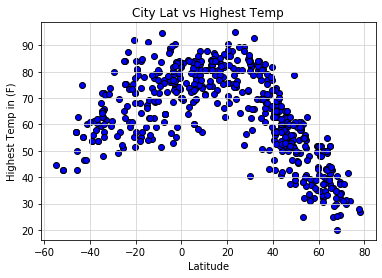

In [8]:
plt.scatter(weather_df["Lat"], weather_df["Highest Temp"],edgecolors="black",facecolors="blue")
plt.title("City Lat vs Highest Temp")
plt.xlabel("Latitude")
plt.ylabel("Highest Temp in (F)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("latvtemp.png")
plt.show()

#### Latitude vs. Humidity Plot

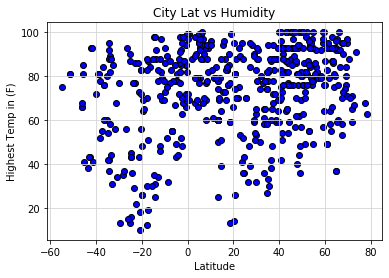

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"],edgecolors="black",facecolors="blue")
plt.title("City Lat vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Highest Temp in (F)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("latvhumid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

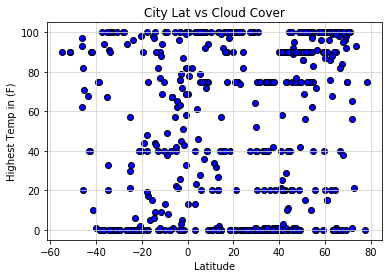

In [13]:
plt.scatter(weather_df["Lat"], weather_df["Cloud Cover"],edgecolors="black",facecolors="blue")
plt.title("City Lat vs Cloud Cover")
plt.xlabel("Latitude")
plt.ylabel("Highest Temp in (F)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("latvcl.png")
plt.show()

#### Latitude vs. Wind Speed Plot

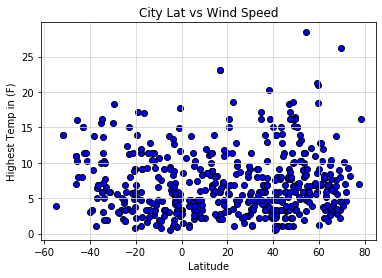

In [14]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.title("City Lat vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Highest Temp in (F)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("latvws.png")
plt.show()